In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import scipy.io
from tqdm import tqdm
from time import process_time 
import time

## Load and visualize data

In [93]:
mat = scipy.io.loadmat('linear_svm.mat')
X_train = mat["X_train"]
X_test = mat["X_test"]
y_train = mat["labels_train"]
y_test = mat["labels_test"]

## Define gradient descent function
Soft-margin formulation of the problem

In [106]:
def gd(iter, X, C, y, w, b, prev_iter=0):
    t = prev_iter * X.shape[0]
    for _ in range(iter):
        for i in range(X.shape[0]):
            t += 1
            eta = 0.1 / np.sqrt(t)
            if y[i] * (np.dot(w, X[i]) + b) < 1:
                w = w - eta * (w - C * y[i] * X[i])
                b = b + eta * C * y[i]
            else:
                w = w - eta * w

    return w, b

In [107]:
w = np.zeros([X_train.shape[1]])
b = 0
C = 5
N = X_train.shape[0]

train_acc = []
test_acc = []
stop = False
iter = 0
prev_cost = 1000000
tol = 1e-5
t1 = time.time()
while iter < 197:
    w, b = gd(1, X_train, C, y_train, w, b, prev_iter=iter)
    cost = 0.5 * np.dot(w,w) + C * np.maximum(np.zeros([N,]), 1 - y_train * (np.dot(w, X_train.T) + b)).sum()
    cost_improvement = abs(prev_cost - cost) / cost
    prev_cost = cost
    print(f"Iter {iter} impr {cost_improvement}")
    if cost_improvement < tol:
        stop = True
    iter += 1
    train_acc.append((np.sign(np.matmul(X_train, w) + b) == y_train.squeeze()).sum() / y_train.shape[0])
    test_acc.append((np.sign(np.matmul(X_test, w) + b) == y_test.squeeze()).sum() / y_test.shape[0])        

t2 = time.time()
print(f"Solution found in {iter} iterations, test acc {test_acc[-1]}")

Iter 0 impr 16.240282766893337
Iter 1 impr 0.015641264929856562
Iter 2 impr 0.003982851043141492
Iter 3 impr 0.004752444483611187
Iter 4 impr 0.017644109340506357
Iter 5 impr 0.00740362967905521
Iter 6 impr 0.010060452438554801
Iter 7 impr 0.002799862238851841
Iter 8 impr 0.004929441962440556
Iter 9 impr 0.0002417537014875809
Iter 10 impr 0.0005405702293978866
Iter 11 impr 0.0001445340533525774
Iter 12 impr 0.0010599263941027696
Iter 13 impr 0.00028485843560560874
Iter 14 impr 0.003385252387612012
Iter 15 impr 0.0010514576668436907
Iter 16 impr 0.0003584142875980207
Iter 17 impr 0.00034157064121122086
Iter 18 impr 0.00041702594484683875
Iter 19 impr 0.000462521265658991
Iter 20 impr 0.00043203304931725125
Iter 21 impr 0.00044079884422269355
Iter 22 impr 0.00011024720647918781
Iter 23 impr 3.206527813403412e-05
Iter 24 impr 0.00015561918986481123
Iter 25 impr 0.0002974414385376699
Iter 26 impr 0.0003284594277221208
Iter 27 impr 0.00018805633827649026
Iter 28 impr 6.368848464002675e-05
I

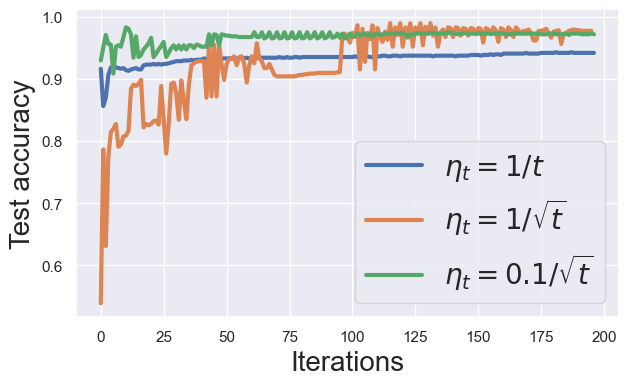

In [111]:
plt.figure()
plt.plot(test_acc_t, linewidth=3)
plt.plot(test_acc_1, linewidth=3)
plt.plot(test_acc_01, linewidth=3)
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)
plt.legend([r"$\eta_t=1/t$", r"$\eta_t=1/\sqrt{t}$", r"$\eta_t=0.1/\sqrt{t}$"], fontsize=20)
plt.rcParams["figure.figsize"] = (7,4)
plt.savefig("lr_sd.pdf", bbox_inches='tight')

In [105]:
train_acc_t = train_acc
test_acc_t = test_acc

In [102]:
train_acc_1 = train_acc
test_acc_1 = test_acc

In [108]:
train_acc_01 = train_acc
test_acc_01 = test_acc

In [110]:
train_acc_001 = train_acc
test_acc_001 = test_acc

In [107]:
# t2-t1

0.515625

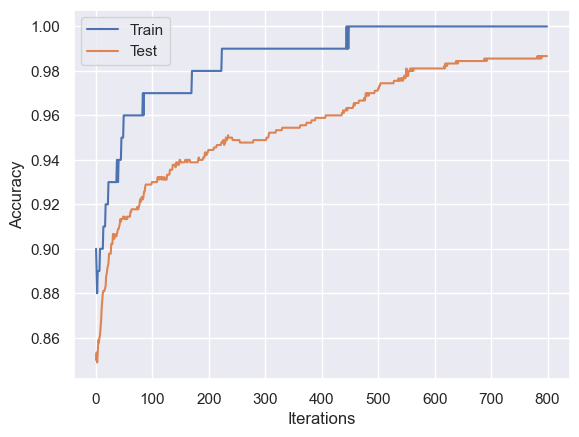

In [104]:
plt.figure()
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(["Train", "Test"])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.savefig("gd_acc.pdf")

## Evaluate model
On test set

In [97]:
print("************ Accuracy *****************")
(np.sign(np.matmul(X_test, w) + b) == y_test.squeeze()).sum() / y_test.shape[0]

************ Accuracy *****************


0.9777777777777777

In [98]:
np.save("w_SDP", w)
np.save("b_SDP", b)

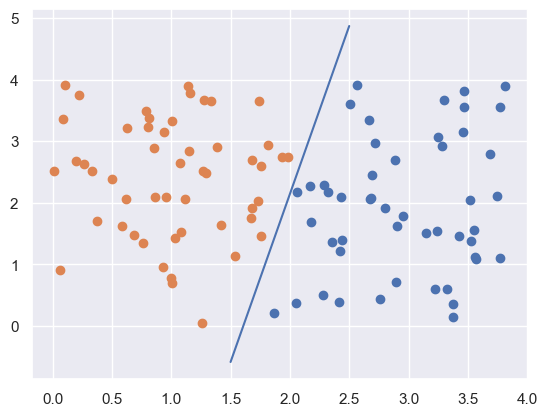

In [12]:
# Plot separation surface
plt.scatter(X_train[y_train.reshape(-1,)==1,0], X_train[y_train.reshape(-1,)==1,1])
plt.scatter(X_train[y_train.reshape(-1,)==-1,0], X_train[y_train.reshape(-1,)==-1,1])
plt.plot(np.linspace(1.5,2.5), np.linspace(1.5,2.5) * (-w[0]/w[1]) - b/w[1])